In [63]:
# Technical Indicators
import tablib as ta

# Plotting graphs
import matplotlib.pyplot as plt

import numpy as np

from pandas_profiling import ProfileReport

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


In [64]:
stock_symbol = 'TWTR'

In [65]:
df = pdr.get_data_yahoo(stock_symbol, '2000-01-01', '2022-11-9')
df = df.dropna()
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670
2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307
2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941
2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755
2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325
...,...,...,...,...,...,...
2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029
2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553
2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848


In [66]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()


In [67]:
df


,Open,High,Low,Close,Adj Close,Volume,S_10,Corr,Open-Close,Open-Open
Date,,,,,,,,,,
2013-12-04,41.270000,43.919998,41.270000,43.689999,43.689999,11028953,41.166,-0.223356,-0.099998,0.580002
2013-12-05,43.450001,46.349998,42.830002,45.619999,45.619999,11813520,41.623,-0.143194,-0.239998,2.180000
2013-12-06,45.750000,45.799999,44.540001,44.950001,44.950001,6236232,41.912,-0.041433,0.130001,2.299999
2013-12-09,45.590000,49.840000,45.020000,49.139999,49.139999,17366614,42.726,0.570999,0.639999,-0.160000
2013-12-10,48.900002,52.580002,48.700001,51.990002,51.990002,25792002,44.019,0.881595,-0.239998,3.310001
...,...,...,...,...,...,...,...,...,...,...
2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029,50.784,0.557250,-2.439999,-2.200001
2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553,50.900,0.623356,0.820000,0.709999
2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848,51.171,0.657834,0.895000,1.705002


In [68]:
profile = ProfileReport(df)


In [69]:
profile.to_file(output_file='./output.html')


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 49.35it/s]


In [70]:
print(df.columns)
print(df.shape[0])


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'S_10', 'Corr',
       'Open-Close', 'Open-Open'],
      dtype='object')
2241


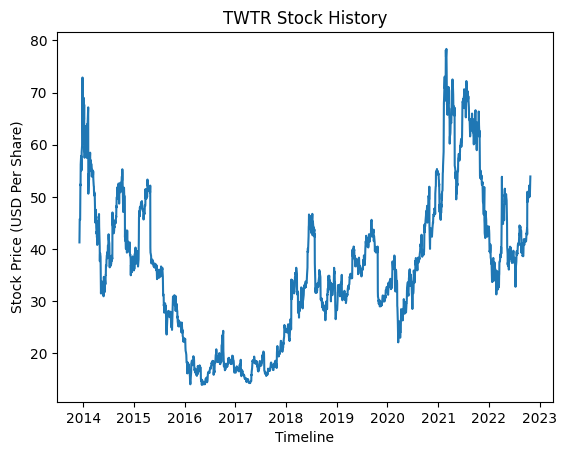

In [71]:
x = np.arange(0, df.shape[0])
dates = df.index

plt.title(f'{stock_symbol} Stock History')
plt.xlabel('Timeline')
plt.ylabel('Stock Price (USD Per Share)')

plt.plot(dates, df['Open'])
plt.show()
